# Processamento de dados sonometro

## Ler ficheiro

In [6]:
import struct
from datetime import datetime, timedelta

fn = "download.bin"

bin_file = open(fn,mode="rb")

header = bin_file.read(5) # Start header
if (header != b'start'): 
    raise(Exception("Wrong header: " + str(header)))

bin_file.read(1) #Spacing byte

bin_date = bin_file.read(6) # read start date from header
start_time = datetime(bin_date[0]+2000,bin_date[1],bin_date[2],bin_date[3],bin_date[4],bin_date[5])

print(start_time)

bin_data = bin_file.read()
#s = ' '.join(map('{:02X}'.format, data))
#print(s)


record_format = 'fB'
record_size = struct.calcsize(record_format)

now = start_time
decibel, s = struct.unpack(record_format, bin_data[0:record_size])

if now.second > s: now += timedelta(minutes=1)

now = now.replace(second=s)

bin_data = bin_data[record_size:]
data = [{"Time": now, "SPL": decibel}]

while (bin_data):
    decibel, s = struct.unpack(record_format, bin_data[0:record_size])
    now += timedelta(seconds=1)
    data.append({"Time": now, "SPL": decibel})
    bin_data = bin_data[record_size:]


bin_file.close()
print("Done!")

2024-11-15 19:40:57
Done!


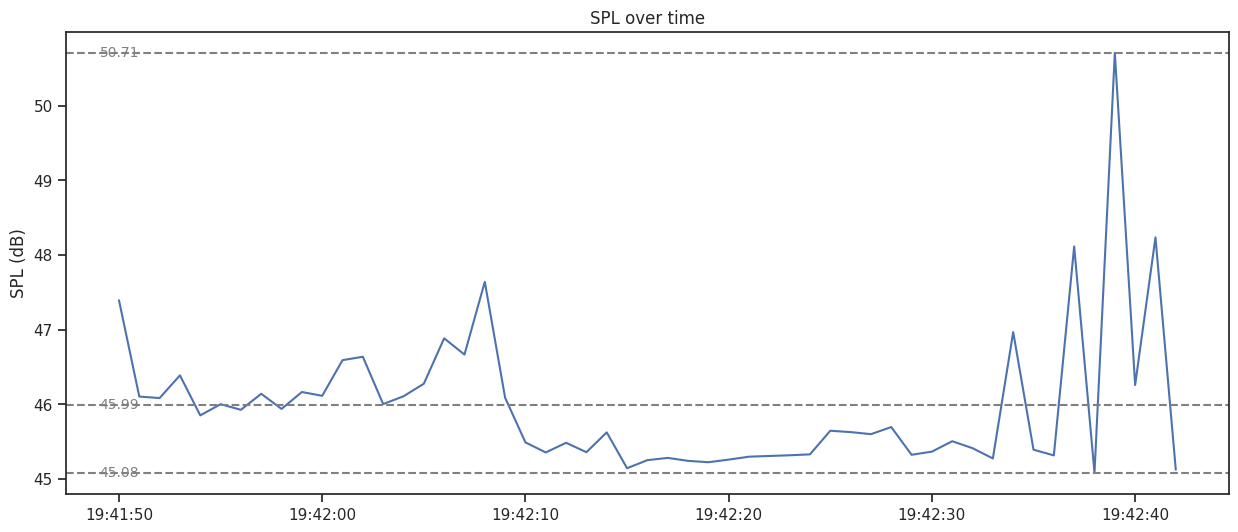

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

data = data[1:] # remove first sample (pressing button)

# Convert to DataFrame
df = pd.DataFrame(data)

# Plot with Seaborn
sns.set(style="ticks")
plt.figure(figsize=(15, 6))
sns.lineplot(x="Time", y="SPL", data=df)

plt.title("SPL over time")
plt.ylabel("SPL (dB)")
plt.xlabel("")

# Calculate statistics
max_value = df["SPL"].max()
min_value = df["SPL"].min()
avg_value = df["SPL"].mean()

# Add dotted lines
plt.axhline(max_value, color="grey", linestyle="--")
plt.axhline(min_value, color="grey", linestyle="--")
plt.axhline(avg_value, color="grey", linestyle="--")

# Annotate the lines with the values
plt.text(df["Time"].iloc[1], max_value, f"{max_value:.2f}", color="grey", 
         va='center', ha='right', fontsize=10)
plt.text(df["Time"].iloc[1], min_value, f"{min_value:.2f}", color="grey", 
         va='center', ha='right', fontsize=10)
plt.text(df["Time"].iloc[1], avg_value, f"{avg_value:.2f}", color="grey", 
         va='center', ha='right', fontsize=10)


plt.savefig("results/" + str(start_time) + ".svg", format="svg")

df.to_csv("results/" + str(start_time) + ".csv", index=False)
